In [27]:
import io
from copy import deepcopy
from matplotlib import pyplot as plt
from PIL import Image
import subprocess
from subprocess import Popen, PIPE
import random

In [22]:
from matplotlib.backends.backend_template import FigureCanvas
def plot_to_PIL(fig, dpi=100):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=dpi)
    buf.seek(0)
    pil_img = deepcopy(Image.open(buf))
    buf.close()
    return pil_img

def interpolate_images(img1, img2, factor):
    # Veic pāreju starp diviem attēliem
    # Factor 0 nozīmē ka pilnībā redzams tikai img1
    # Factor 1 nozīmē ka pilnībā redzams tikai img2
    # Tiek pieņemts ka attēliem ir vienādas dimensijas - ja tā nav - pats esi vainīgs
    # Tiek arī pieņemts ka abu attēlu feature vērtības ir apgabalā [0;+1] (kas ir arī SOM svaru īpašība)
    new_image = [
        [
            [img1[i][j][0]*(1-factor) + img2[i][j][0]*factor,
             img1[i][j][1]*(1-factor) + img2[i][j][1]*factor,
             img1[i][j][2]*(1-factor) + img2[i][j][2]*factor] for j in range(len(img1[0]))
        ] for i in range(len(img1))
    ]

    return new_image

def random_image(dimension):
    new_image = [[[random.random(),random.random(),random.random()] for j in range(dimension)] for i in range(dimension)]

    return new_image

# image ir NxN masīvs, kurā katrs elements ir vektors [x1, x2, x3]
def plot_som(image, meta_this_epoch=None, meta_max_epoch=None):
    fig = plt.Figure(figsize=[len(image), len(image[0])])
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

    if meta_this_epoch is not None and meta_max_epoch is not None:
        ax.set_title("Epoha {} no {}".format(meta_this_epoch, meta_max_epoch))

    ax.imshow(image, interpolation='gaussian')
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
    #ax.axis('tight')
    #ax.axis('off')
    return fig

# image_list ir masīvs, kurš sastāv no iepriekš aprakstītā veida "images"
def som_animation(image_list, frames_per_epoch=30):
    previous_image = None

    fps, duration = frames_per_epoch, frames_per_epoch * (len(image_list)-1)
    p = Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'png', '-r', str(fps), '-i', '-', '-vcodec', 'mpeg4', '-qscale', '5', '-r', str(fps), 'video.mp4'], stdin=PIPE, stdout=PIPE)
    for idx, img in enumerate(image_list):
        if previous_image is None:
            # Vajag uzstādīt pirmo attēlu, no kura notiks pāreja
            previous_image = img
            continue

        for i in range(frames_per_epoch):
            interp_img = interpolate_images(previous_image, img, i/frames_per_epoch)
            fig = plot_som(interp_img, meta_this_epoch=idx, meta_max_epoch=len(image_list))
            pil_fig = plot_to_PIL(fig)
            pil_fig.save(p.stdin, 'PNG')
            fig.clf()
        previous_image = img

    p.stdin.close()
    p.wait()

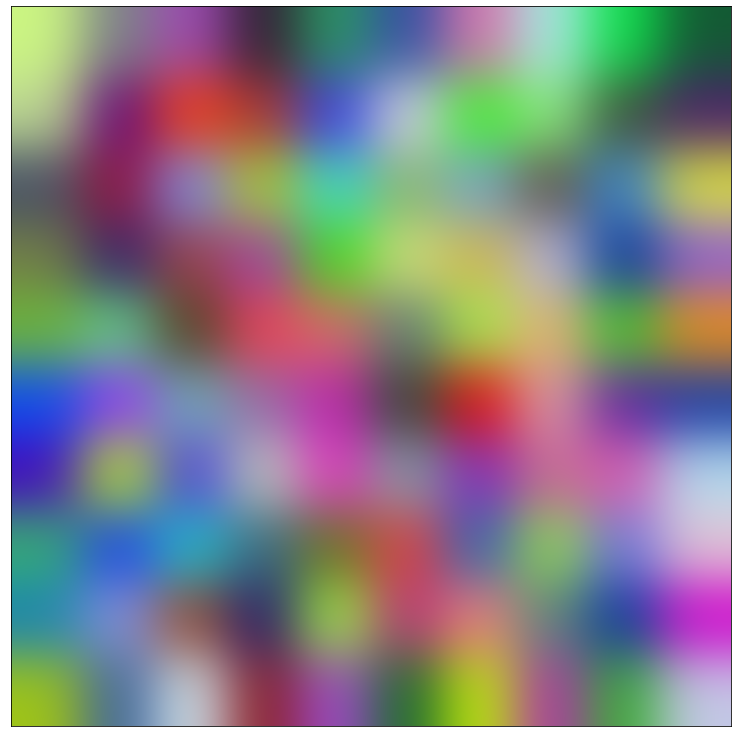

In [23]:
list_x = [random_image(10) for i in range(2)]
plot_som(list_x[0])

In [25]:
som_animation(list_x, 30)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [29]:
subprocess.call(["echo", "farts"])

FileNotFoundError: [WinError 2] The system cannot find the file specified